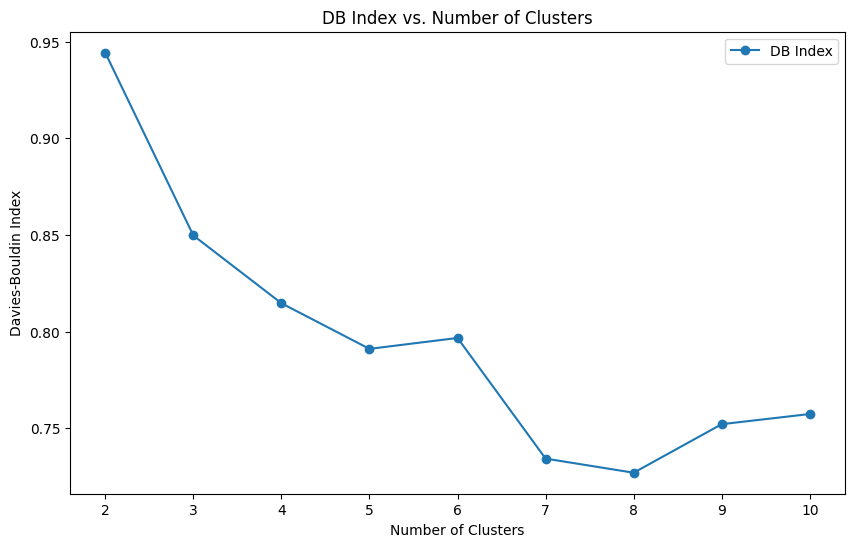

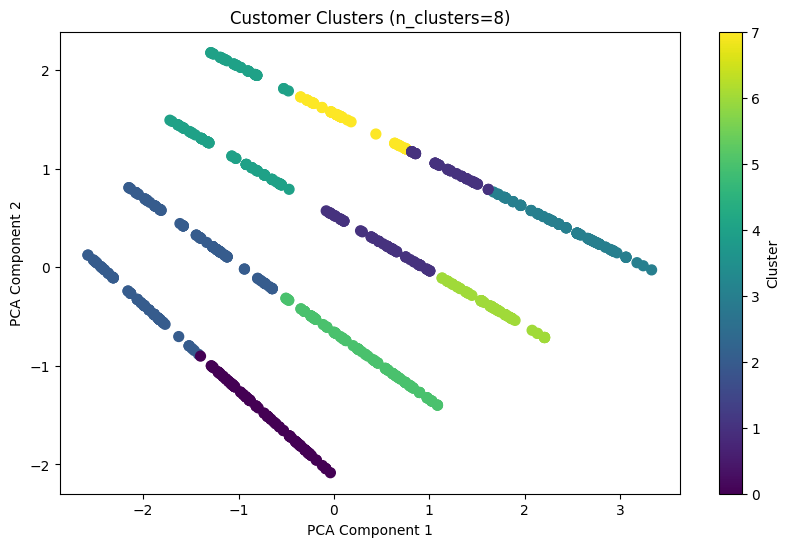

Optimal Number of Clusters: 8
DB Index for Optimal Clustering: 0.7270574365948117


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets on CustomerID
data = pd.merge(customers, transactions, on="CustomerID")

# Preprocess data
numeric_columns = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Perform clustering
db_indices = []
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)

    db_index = davies_bouldin_score(data_scaled, cluster_labels)
    db_indices.append(db_index)

    silhouette = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette)

# Plot DB Index for different cluster numbers
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_indices, marker="o", label="DB Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("DB Index vs. Number of Clusters")
plt.legend()
plt.show()

# Final Clustering with Optimal Number of Clusters
optimal_clusters = db_indices.index(min(db_indices)) + 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data["Cluster"] = kmeans.fit_predict(data_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data["Cluster"], cmap="viridis", s=50)
plt.title(f"Customer Clusters (n_clusters={optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Report results
print("Optimal Number of Clusters:", optimal_clusters)
print("DB Index for Optimal Clustering:", min(db_indices))
